In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

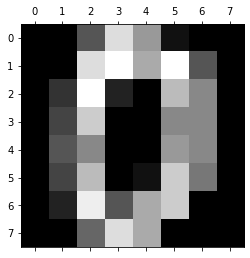

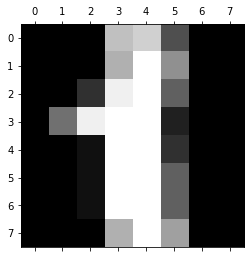

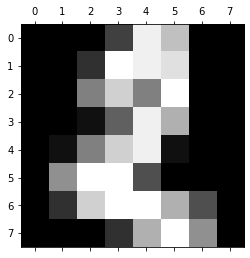

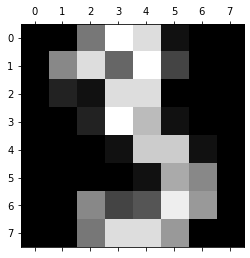

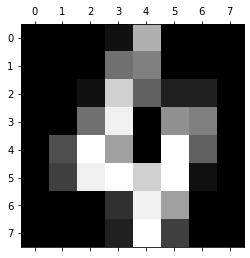

In [41]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])
    

plt.show()

In [6]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

## TRAIN TEST SPLIT

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [9]:
len(x_train)


1437

In [10]:
len(x_test)

360

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression()

In [13]:
model.fit(x_train,y_train)

c:\users\hrithik\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
model.score(x_test,y_test)

0.975

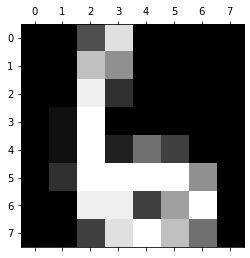

In [16]:
plt.matshow(digits.images[67])

In [19]:
digits.target[67]

6

In [23]:
model.predict([digits.data[67]])

array([6])

In [24]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

## CONFUSION MATRIX- places where my prediction goes wrong

In [27]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predicted)
cm

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 29,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1,  0, 33,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 34]], dtype=int64)

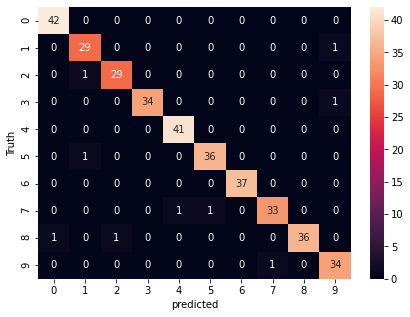

In [34]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")
plt.show()